In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Docs: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [2]:
# read in cycling data
df = pd.read_json('data/cycling.json')
df.head(2)

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes
2024-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,Tuesday,
2024-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,NaN,Monday,


In [3]:
df_numerical = df.iloc[:,:-2]
df_numerical['Total'] = df_numerical.fillna(0).sum(axis=1)

In [4]:
df_numerical.describe()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Total
count,116.000000,140.0000,172.000000,382.000000,319.000000,330.000000,518.000000,19.000000,31.000000,2005.000000
mean,12.215517,12.7400,14.177907,13.352094,14.894922,14.897576,16.461892,14.905263,12.032258,14.758524
std,3.428997,4.1464,3.568704,4.113786,4.630934,3.955197,4.119513,4.717635,6.351765,4.341504
min,3.000000,3.0000,7.000000,2.900000,2.500000,3.000000,2.800000,7.600000,1.500000,2.500000
25%,10.475000,10.0000,11.850000,11.100000,12.400000,12.000000,14.400000,11.950000,7.250000,12.000000
50%,11.950000,12.5000,13.750000,12.700000,14.800000,15.000000,15.500000,15.300000,12.400000,14.700000
75%,14.200000,14.0000,16.000000,15.300000,17.100000,17.600000,18.200000,16.450000,16.100000,16.800000
max,20.800000,30.7000,25.300000,35.800000,35.900000,32.900000,40.000000,27.200000,25.600000,40.000000


## Boxplots

This first way to creating a multiple boxplot seems very flaky.  It will plot right after restarting the kernel but after the first plot any re-evaluation creates ambiguous results!

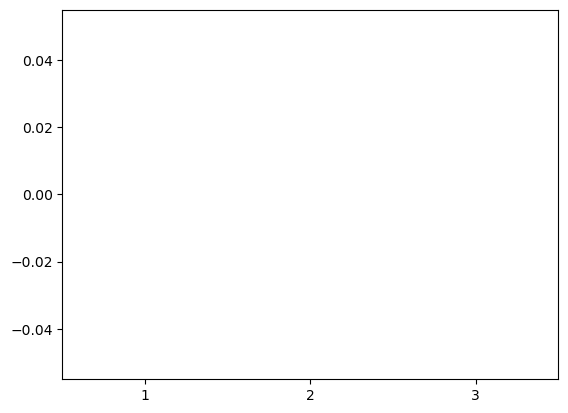

In [5]:
plt.boxplot(df_numerical[['FX 7.5', 'S2017', 'C3']])
plt.show()

Using the data.boxplot() syntax appears to work more reliably.

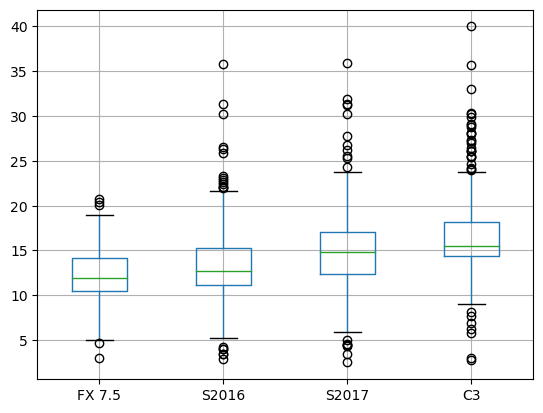

In [6]:
df_numerical[['FX 7.5', 'S2016', 'S2017', 'C3']].boxplot()
plt.show()

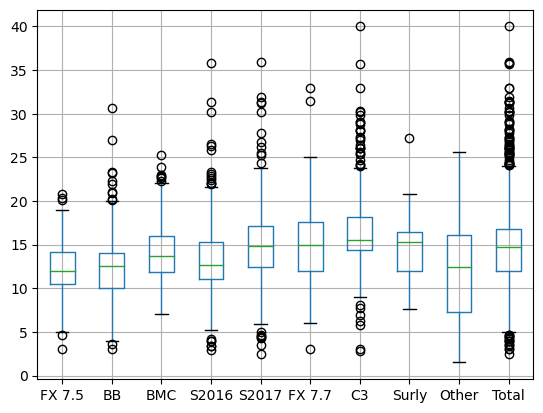

In [7]:
df_numerical.boxplot()
plt.show()

In [8]:
import seaborn as sns

The default seaborn plot is much prettier than the default pandas plot as would be expected.

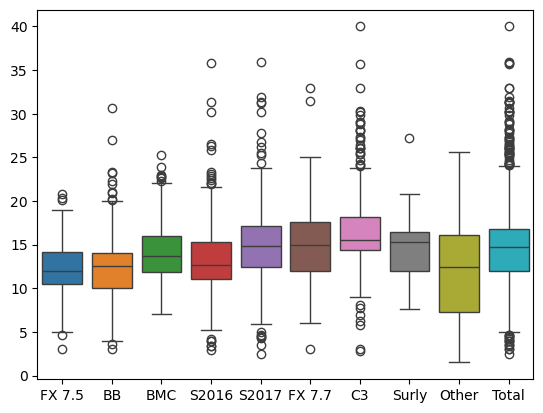

In [9]:
sns.boxplot(data=df_numerical)
plt.show()

It seems like boxplots have more options if the data is in long format so let's create a long version of the data.  This also allows us to get rid of all the NaNs.

In [10]:
dfl = pd.melt(df_numerical, ignore_index=False, 
              var_name='bike', 
              value_vars=df_numerical.columns).dropna()

With the long format data we can now specify what we want for both the X and Y axes.

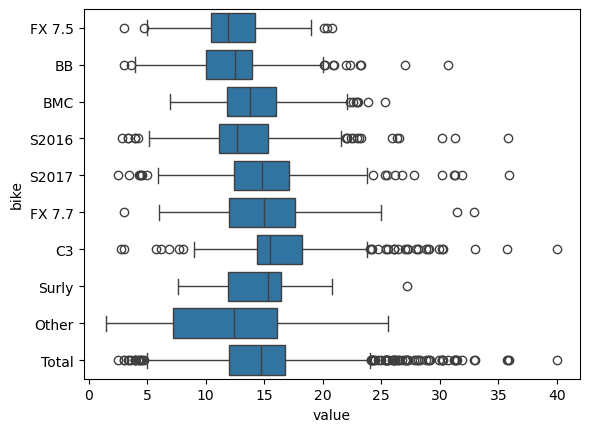

In [11]:
sns.boxplot(x='value', y='bike', data=dfl)
plt.show()

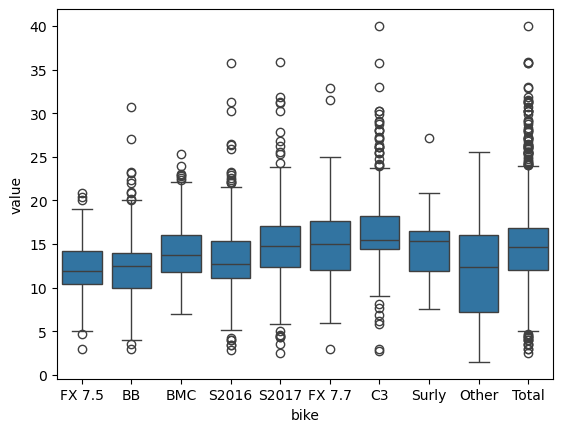

In [12]:
sns.boxplot(y='value', x='bike', data=dfl)
plt.show()

If we would prefer to display the whiskers over the entire data range rather than having outlier does we can do that.

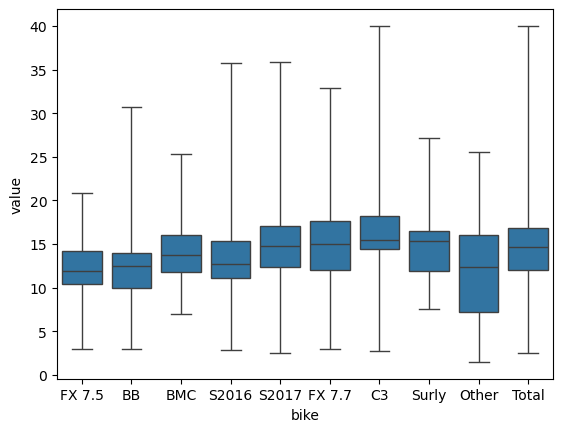

In [13]:
sns.boxplot(y='value', x='bike', data=dfl, whis=(0, 100))
plt.show()

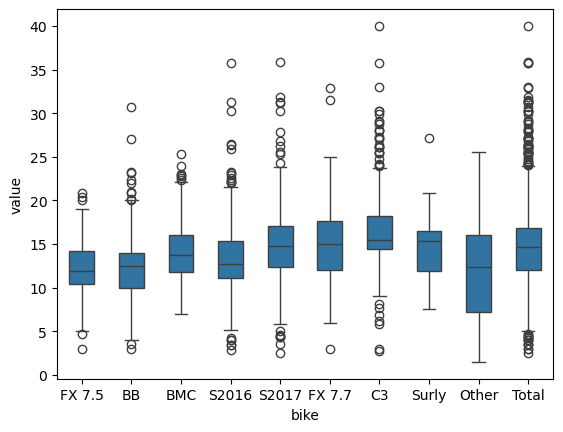

In [14]:
sns.boxplot(y='value', x='bike', data=dfl, width=.5)
plt.show()

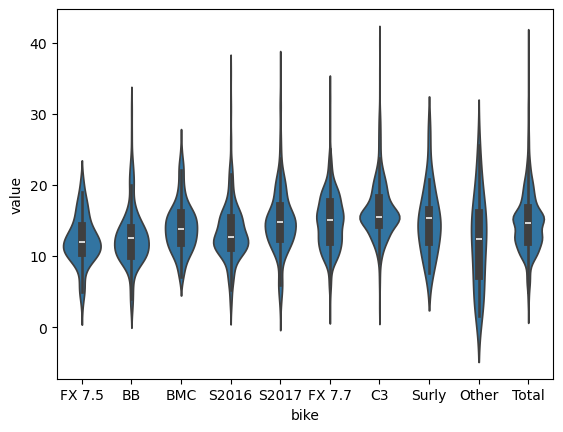

In [15]:
sns.violinplot(y='value', x='bike', data=dfl)
plt.show()

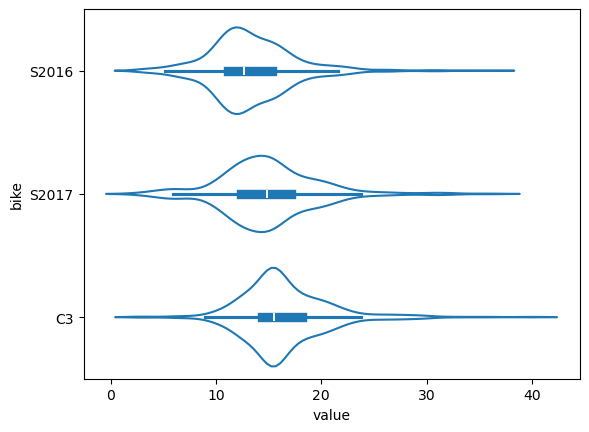

In [16]:
dfl_small = dfl[dfl.bike.isin(['S2016', 'S2017', 'C3'])]
sns.violinplot(x='value', y='bike', data=dfl_small, fill=False)
plt.show()

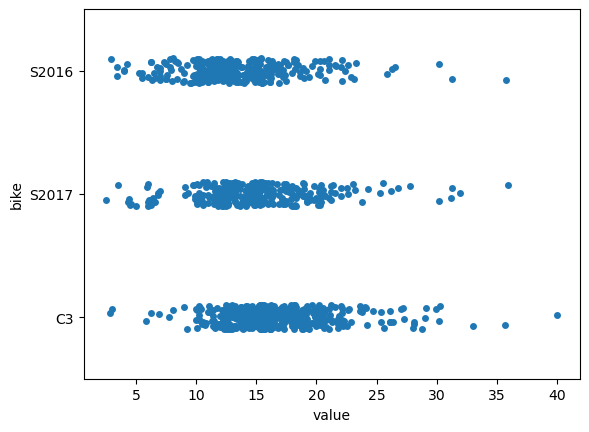

In [17]:
sns.stripplot(x='value', y='bike', data=dfl_small)
plt.show()

/Users/dane/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dane/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dane/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dane/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use strip

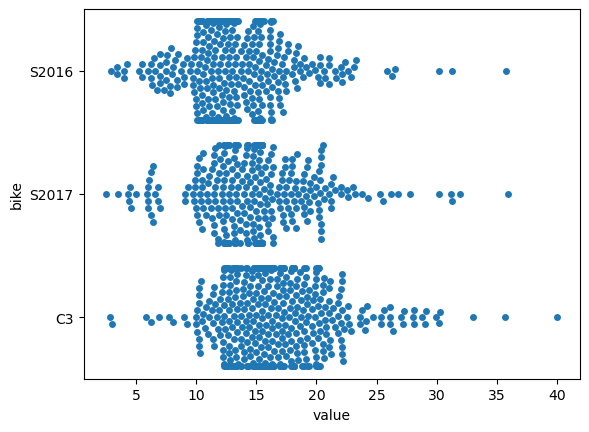

In [18]:
sns.swarmplot(x='value', y='bike', data=dfl_small)
plt.show()